<a href="https://colab.research.google.com/github/jotsap/DS7331/blob/master/notebooks/variable_relationship_discovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### What we do: explore relationships among variables, especially features to thg target variable 
Initiated by Shawn Jung 
<br> Last update: 1/19/2020

In [0]:
# loading libraries 
import pandas as pd 
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [0]:
# import data file from our github repository. Be sure to use the 'raw' address when directly loading csv from github. Using this link address would cause an error https://github.com/jotsap/DS7331/blob/master/data/churn.csv
url = 'https://raw.githubusercontent.com/jotsap/DS7331/master/data/churn.csv'
df = pd.read_csv(url)

In [0]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [0]:
ProfileReport(df)
# Let's use pandas-profiling report to conduct exploratory data analysis. We will need to run EDA in various ways

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,21
Number of observations,7043
Total Missing (%),0.0%
Total size in memory,1.1 MiB
Average record size in memory,168.0 B
Numeric,2
Categorical,17
Boolean,1
Date,0
Text (Unique),1
Rejected,0


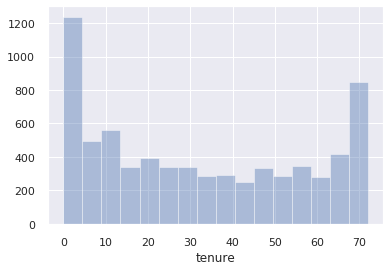

In [0]:
# I wanted to see if Tenure, Monthely Charges and Total Charges can be transformed into 'category values'. So let's check their histograms 
sns.distplot(df['tenure'], kde=False)
# I see lots of short-term customemrs and long-term loyal customers at sides. It might be worthwhile to define stratified category variable over 'tenure'

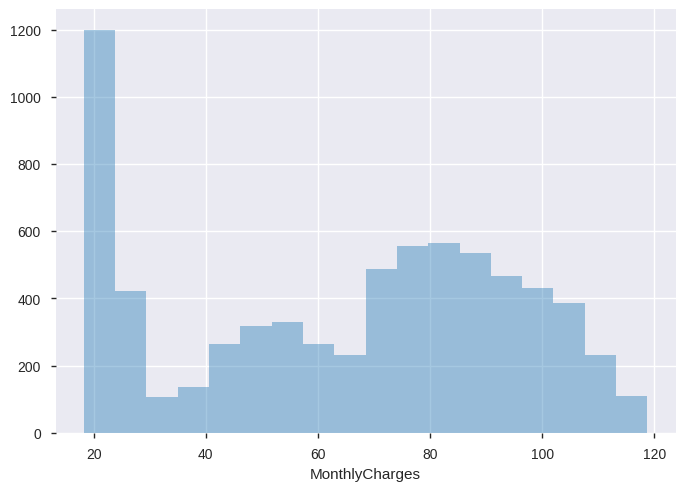

In [0]:
sns.distplot(df['MonthlyCharges'], kde=False)


In [0]:
# the profiling report mentioned 'cardinality' issues with TotalCharges. And the dtype is defined as 'object' with 6531 unique variables.
# I assume string values are hidden whit this float-like feature 
df['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [0]:
hidden_charge = []
for i, item in enumerate(df['TotalCharges']):
  try:
    float(item)
  except ValueError:
    print('Error at index {}: {!r}'.format(i, item))
    hidden_charge.append(i)

Error at index 488: ' '
Error at index 753: ' '
Error at index 936: ' '
Error at index 1082: ' '
Error at index 1340: ' '
Error at index 3331: ' '
Error at index 3826: ' '
Error at index 4380: ' '
Error at index 5218: ' '
Error at index 6670: ' '
Error at index 6754: ' '


In [0]:
# Need to do something for these records with 'empty' TotalCharge.  
df.iloc[hidden_charge]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [0]:
# I assume they just joined the telecom company, so their internal DB set the TotalCharges as zero. The values of records with 'tenure=1' confirmes this assumption. 
df[df['tenure']==1][['tenure', 'MonthlyCharges','TotalCharges']].tail()

,tenure,MonthlyCharges,TotalCharges
6979,1,24.20,24.2
7010,1,74.45,74.45
7016,1,49.95,49.95
7018,1,70.65,70.65
7032,1,75.75,75.75


In [0]:
# I would set 0 to TotalCharges with 0 tenure month, and change the data types to float


In [0]:
df.iloc[hidden_charge,19]=0


In [0]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

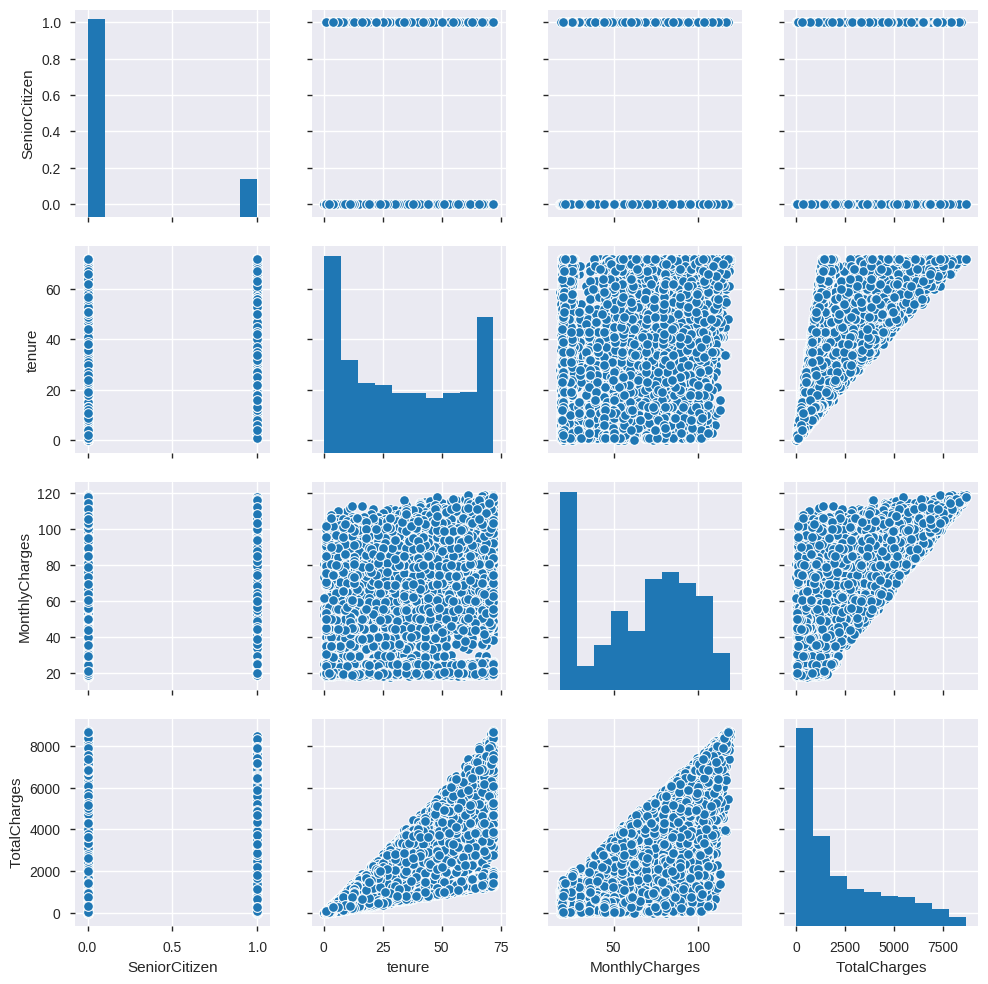

In [0]:
# now let's show scatter plot among values 
sns.pairplot(df)